<font color='orange'><h2 align="center">Taller 3: análisis de redes sociales. - PRIMERA PARTE</h2></font>

In [1]:
##Download scikit-learn library. 

!pip install -U scikit-learn

<h4 align="left"> Training a sentiment analysis classifier based on supervised machine learning algorithms. </h4> 

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)



<font color='purple'><h4 align="left"> 1) First training. </h4></font>

<h4 align="left"> Loading labeled tweets. </h4> 

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets.csv', sep = ',')

In [6]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [7]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4838
0.0     637
1.0     561
Name: sentiment, dtype: int64

In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.801524
0.0    0.105533
1.0    0.092942
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [9]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(1198, 2)

In [11]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_nolabeled_df.shape

(4838, 2)

<h4 align="left"> Splitting train and test datasets. </h4> 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [14]:
X_train.shape

(958,)

In [15]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.531315
1.0    0.468685
Name: sentiment, dtype: float64

In [16]:
X_test.shape

(240,)

In [17]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.533333
1.0    0.466667
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [18]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [19]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
X_bow = bow.fit_transform(X_train)

In [21]:
X_tfidf = tfidf.fit_transform(X_train)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [22]:
logistic_model = LogisticRegression(random_state = 2)

In [23]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [24]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

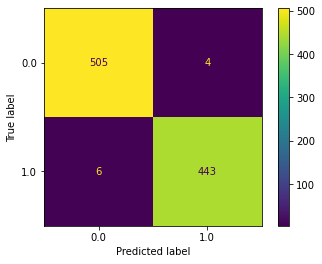

In [25]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

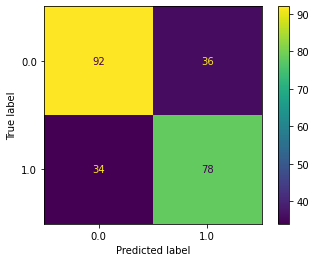

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [27]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6842105263157895
Recall: 0.6964285714285714
F1: 0.6902654867256636


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [28]:
logistic_model = LogisticRegression(random_state = 2)

In [29]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [30]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

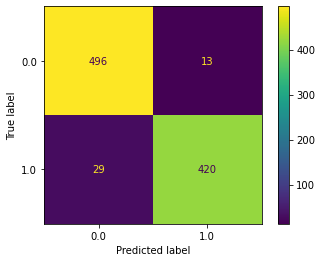

In [31]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

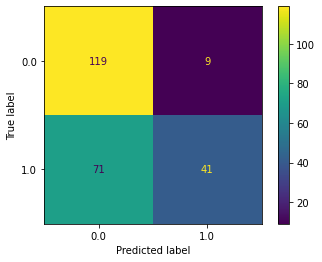

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [33]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.82
Recall: 0.36607142857142855
F1: 0.5061728395061729


<font color='purple'><h4 align="left"> 2) Second training with more data. </h4></font>

<h4 align="left"> Loading labeled tweets. </h4> 

In [34]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df2 = pd.read_csv('./data/medellin_tweets3.csv', sep = ',')

In [35]:
tweets_df2.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [36]:
tweets_df2['sentiment'].value_counts(dropna = False)

NaN    4738
0.0     693
1.0     605
Name: sentiment, dtype: int64

In [37]:
tweets_df2['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.784957
0.0    0.114811
1.0    0.100232
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [38]:
tweets_labeled_df2 = tweets_df2.loc[tweets_df2['sentiment'].notnull()]

In [39]:
tweets_labeled_df2.shape

(1298, 2)

In [40]:
tweets_nolabeled_df2 = tweets_df2.loc[tweets_df2['sentiment'].isnull()]

In [41]:
tweets_nolabeled_df2.shape

(4738, 2)

<h4 align="left"> Splitting train and test datasets. </h4> 

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(tweets_labeled_df2['full_text'], tweets_labeled_df2['sentiment'], test_size = 0.2, stratify = tweets_labeled_df2['sentiment'], random_state = 1)

In [43]:
X_train2.shape

(1038,)

In [44]:
pd.Series(y_train2).value_counts(normalize = True)

0.0    0.533719
1.0    0.466281
Name: sentiment, dtype: float64

In [45]:
X_test2.shape

(260,)

In [46]:
pd.Series(y_test2).value_counts(normalize = True)

0.0    0.534615
1.0    0.465385
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [47]:
bow2 = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [48]:
tfidf2 = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [49]:
X_bow2 = bow.fit_transform(X_train2)

In [50]:
X_tfidf2 = tfidf.fit_transform(X_train2)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [51]:
logistic_model = LogisticRegression(random_state = 2)

In [52]:
logistic_model.fit(X_bow2, y_train2)

LogisticRegression(random_state=2)

In [53]:
y_train_bow_predict2 = logistic_model.predict(X_bow2)
y_test_bow_predict2 = logistic_model.predict(bow.transform(X_test2))

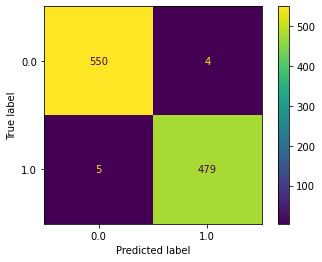

In [54]:
ConfusionMatrixDisplay.from_predictions(y_train2, y_train_bow_predict2)

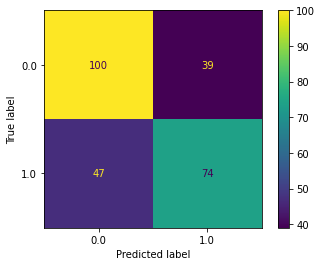

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_test_bow_predict2)

In [56]:
print('Precision:', precision_score(y_test2, y_test_bow_predict2))
print('Recall:', recall_score(y_test2, y_test_bow_predict2))
print('F1:', f1_score(y_test2, y_test_bow_predict2))

Precision: 0.6548672566371682
Recall: 0.6115702479338843
F1: 0.6324786324786326


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [57]:
logistic_model = LogisticRegression(random_state = 2)

In [58]:
logistic_model.fit(X_tfidf2, y_train2)

LogisticRegression(random_state=2)

In [59]:
y_train_tfidf_predict2 = logistic_model.predict(X_tfidf2)
y_test_tfidf_predict2 = logistic_model.predict(bow.transform(X_test2))

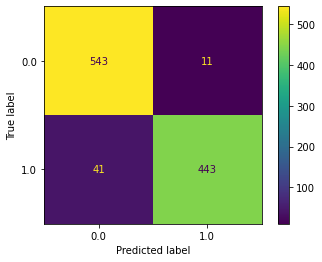

In [60]:
ConfusionMatrixDisplay.from_predictions(y_train2, y_train_tfidf_predict2)

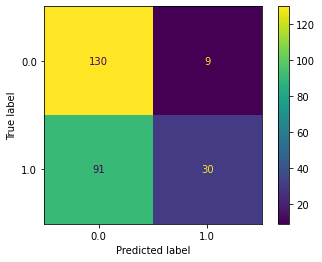

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_test_tfidf_predict2)

In [62]:
print('Precision:', precision_score(y_test2, y_test_tfidf_predict2))
print('Recall:', recall_score(y_test2, y_test_tfidf_predict2))
print('F1:', f1_score(y_test2, y_test_tfidf_predict2))

Precision: 0.7692307692307693
Recall: 0.24793388429752067
F1: 0.37500000000000006


<font color='purple'><h4 align="left"> 3) Third training with more data. </h4></font>

<h4 align="left"> Loading labeled tweets. </h4> 

In [63]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df3 = pd.read_csv('./data/medellin_tweets4.csv', sep = ',')

In [64]:
tweets_df3.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [65]:
tweets_df3['sentiment'].value_counts(dropna = False)

NaN    4638
0.0     751
1.0     647
Name: sentiment, dtype: int64

In [66]:
tweets_df3['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.76839
0.0    0.12442
1.0    0.10719
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [67]:
tweets_labeled_df3 = tweets_df3.loc[tweets_df3['sentiment'].notnull()]

In [68]:
tweets_labeled_df3.shape

(1398, 2)

In [69]:
tweets_nolabeled_df3 = tweets_df3.loc[tweets_df3['sentiment'].isnull()]

In [70]:
tweets_nolabeled_df3.shape

(4638, 2)

<h4 align="left"> Splitting train and test datasets. </h4> 

In [71]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(tweets_labeled_df3['full_text'], tweets_labeled_df3['sentiment'], test_size = 0.2, stratify = tweets_labeled_df3['sentiment'], random_state = 1)

In [72]:
X_train3.shape

(1118,)

In [73]:
pd.Series(y_train3).value_counts(normalize = True)

0.0    0.537567
1.0    0.462433
Name: sentiment, dtype: float64

In [74]:
X_test3.shape

(280,)

In [75]:
pd.Series(y_test3).value_counts(normalize = True)

0.0    0.535714
1.0    0.464286
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [76]:
bow3 = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [77]:
tfidf3 = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [78]:
X_bow3 = bow.fit_transform(X_train3)

In [79]:
X_tfidf3 = tfidf.fit_transform(X_train3)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [80]:
logistic_model = LogisticRegression(random_state = 2)

In [81]:
logistic_model.fit(X_bow3, y_train3)

LogisticRegression(random_state=2)

In [82]:
y_train_bow_predict3 = logistic_model.predict(X_bow3)
y_test_bow_predict3 = logistic_model.predict(bow.transform(X_test3))

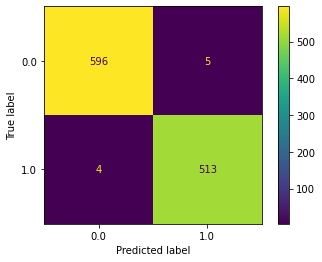

In [83]:
ConfusionMatrixDisplay.from_predictions(y_train3, y_train_bow_predict3)

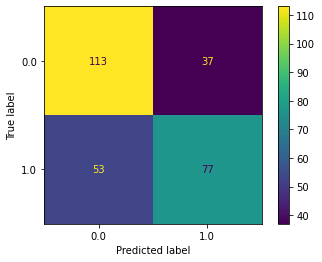

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test3, y_test_bow_predict3)

In [85]:
print('Precision:', precision_score(y_test3, y_test_bow_predict3))
print('Recall:', recall_score(y_test3, y_test_bow_predict3))
print('F1:', f1_score(y_test3, y_test_bow_predict3))

Precision: 0.6754385964912281
Recall: 0.5923076923076923
F1: 0.6311475409836065


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [86]:
logistic_model = LogisticRegression(random_state = 2)

In [87]:
logistic_model.fit(X_tfidf3, y_train3)

LogisticRegression(random_state=2)

In [88]:
y_train_tfidf_predict3 = logistic_model.predict(X_tfidf3)
y_test_tfidf_predict3 = logistic_model.predict(bow.transform(X_test3))

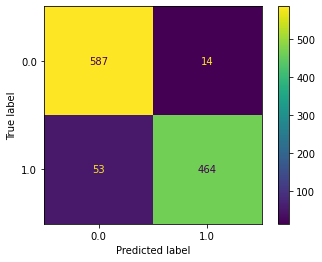

In [89]:
ConfusionMatrixDisplay.from_predictions(y_train3, y_train_tfidf_predict3)

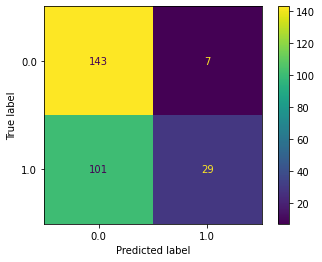

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test3, y_test_tfidf_predict3)

In [91]:
print('Precision:', precision_score(y_test3, y_test_tfidf_predict3))
print('Recall:', recall_score(y_test3, y_test_tfidf_predict3))
print('F1:', f1_score(y_test3, y_test_tfidf_predict3))

Precision: 0.8055555555555556
Recall: 0.2230769230769231
F1: 0.3493975903614458
